In [12]:
using Random, Distributions, Plots, SparseArrays

In [130]:
# network params
J = 6
g = 0.3
Ev = 0.5
E = Ev * ones(Nt, N)

Ne = 200
Ni = 50
N = Ne + Ni
pE = 0.2
pI = 0.8;

In [131]:
# connectivity matrix
JmatE = sprand(Bool, N, Ne, pE)
JmatE = Float64.(JmatE)
JmatE .*= (J / pE / Ne)

JmatI = sprand(Bool, N, Ni, pI)
JmatI = Float64.(JmatI)
JmatI .*= (-g * J / pI / Ni);

Jmat = sparse_hcat(JmatE, JmatI);

In [132]:
# simulation parameters
tstop = 20
dt = 0.001
tplot = collect(0:dt:tstop)
Nt = Int(tstop / dt);

In [133]:
function intensity(v, B=1, v_th=1, p=1)
    x = v .- v_th

    x[x .< 0] .= 0

    B .* x.^p
end

intensity (generic function with 4 methods)

In [134]:
# initial params
v = zeros(Nt, N) # voltage
v[1,:] = rand(N)
v_th = 1
v_r = 0
n = zeros(Nt, N) # spikes
spkind = []

# perturbations
perturb_amp = 2
perturb_len = 2

t_start_perturb1 = Int(Nt / 4)
t_end_perturb1 = t_start_perturb1 + Int(perturb_len / dt)

t_start_perturb2 = 3 * t_start_perturb1
t_end_perturb2 = t_start_perturb2 + Int(perturb_len / dt)

E[t_start_perturb1:t_end_perturb1,:] .+= perturb_amp
E[t_start_perturb2:t_end_perturb2,:] .-= perturb_amp;

In [164]:
for t = 2:Nt
    v[t,:] .= v[t-1,:] .+ (dt .* (-v[t-1,:] .+ E[t-1,:])) .+ (Jmat * n[t-1,:])
    v[t,spkind] .= v_r

    lam = intensity(v[t,:])
    lam[lam .> (1/dt)] .= 1 / dt

    n[t,:] = rand.(Bernoulli.(dt .* lam))

    spkind = findall(n[t,:] .> 0)
end

spkind_all = findall(n .> 0)
st,sni = dt .* getindex.(spkind_all,1), getindex.(spkind_all,2);

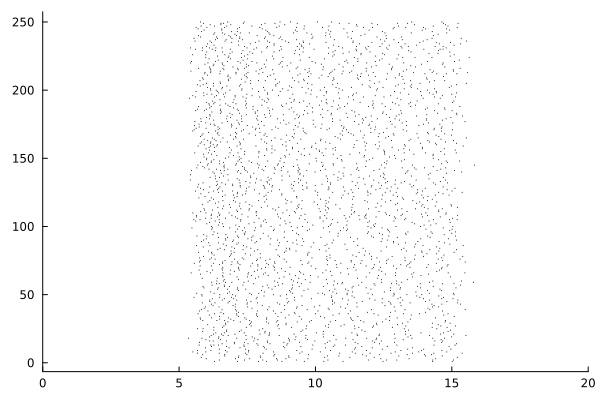

In [165]:
plot(st, sni,
     seriestype = :scatter,
     markershape = :vline,
     color = :black,
     markersize = 0.5,
     legend = false,
     grid = false)

xlims!(0, 20)